In [1]:
from nltk.corpus import wordnet
def getSynset(wnid):
    pos = wnid[0]
    offset = wnid[1:]
    return wordnet._synset_from_pos_and_offset(pos,int(offset))
def getWordnetID(syn):
    return syn.pos()+('%08d' % syn.offset())

In [2]:
from pprint import pprint
dog = wordnet.synset('dog.n.01')
print dog.hypernyms()
print dog.hypernym_paths()
hyp = lambda s:s.hypernyms()
pprint (dog.tree(hyp))
print dog.tree(hyp)
print wordnet.ss2of(dog)
dog_id =  dog.pos() + ('%08d' % dog.offset())
print getSynset(dog_id)

[Synset('canine.n.02'), Synset('domestic_animal.n.01')]
[[Synset('entity.n.01'), Synset('physical_entity.n.01'), Synset('object.n.01'), Synset('whole.n.02'), Synset('living_thing.n.01'), Synset('organism.n.01'), Synset('animal.n.01'), Synset('chordate.n.01'), Synset('vertebrate.n.01'), Synset('mammal.n.01'), Synset('placental.n.01'), Synset('carnivore.n.01'), Synset('canine.n.02'), Synset('dog.n.01')], [Synset('entity.n.01'), Synset('physical_entity.n.01'), Synset('object.n.01'), Synset('whole.n.02'), Synset('living_thing.n.01'), Synset('organism.n.01'), Synset('animal.n.01'), Synset('domestic_animal.n.01'), Synset('dog.n.01')]]
[Synset('dog.n.01'),
 [Synset('canine.n.02'),
  [Synset('carnivore.n.01'),
   [Synset('placental.n.01'),
    [Synset('mammal.n.01'),
     [Synset('vertebrate.n.01'),
      [Synset('chordate.n.01'),
       [Synset('animal.n.01'),
        [Synset('organism.n.01'),
         [Synset('living_thing.n.01'),
          [Synset('whole.n.02'),
           [Synset('object.n

In [3]:
e = wordnet.synsets('entity')
print e

[Synset('entity.n.01')]


entity = wordnet.synset('entity.n.01')
hypo = lambda s:s.hyponyms()
pprint (entity.tree(hypo))

In [7]:
f = open("./openimages/data_humman_des_deal_uniq1124.tsv")
words = {}
for line in f:
    WordnetID,Synsets,Definition = line.split("\t")
    if WordnetID == "WordnetID":
        continue
    words[getSynset(WordnetID)]=0

In [8]:
#深度搜索，计算每个synset的level
def dfs(sync, lev):
    if sync in words:
        words[sync] = lev
    childs = sync.hyponyms()
    if len(childs):
        for ch in childs:
            dfs(ch, lev+1)

In [9]:
entity = wordnet.synset('entity.n.01')
dfs(entity, 1)

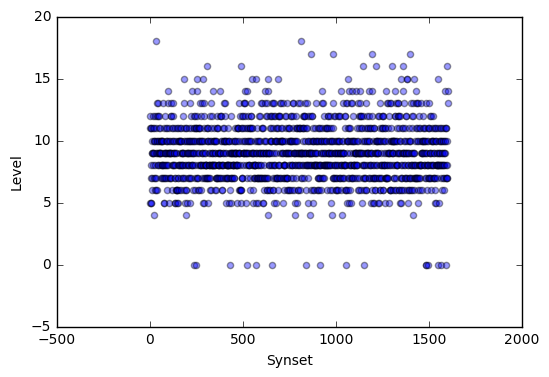

In [24]:
#散点图：每个synset的level
import matplotlib.pyplot as plt
syns = words.keys()
counts = words.values()
x = [num for num in range(len(x))]
y = counts
plt.xlabel('Synset')
plt.ylabel('Level')
plt.scatter(x,y,alpha=0.4,marker='o')
plt.show()

 Synset('earth.n.01') Synset('bengal.n.01') Synset('toyota.n.01') Synset('torrid_zone.n.01') Synset('buddha.n.01') Synset('north-polar.s.01') Synset('alps.n.01') Synset('caribbean.n.02') Synset('sahara.n.01') Synset('arctic_ocean.n.01') Synset('moon.n.01') Synset('middle_ages.n.01') Synset('isle.n.01') Synset('ford.n.06') Synset('sun.n.01') Synset('rome.n.01')

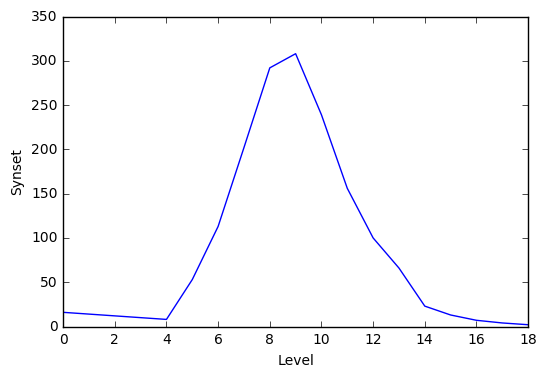

 zero_cnt = 16


In [32]:
#频率图：每个层次出现的次数
import matplotlib.pyplot as plt
lev_cnt = {}
zero_cnt = 0
for syn_lev in words.iteritems():
    syn = syn_lev[0]
    lev = syn_lev[1]
    if lev == 0:
        zero_cnt +=1
#         print syn,
    if lev in lev_cnt:
        lev_cnt[lev] += 1
    else:
        lev_cnt[lev] = 1
lev = lev_cnt.keys()
cnt = lev_cnt.values()
plt.xlabel('Level')
plt.ylabel('Synset')
plt.plot(lev, cnt)
plt.show()
print 'zero_cnt = '+ str(zero_cnt)

In [33]:
moon = wordnet.synset('sun.n.01')
print moon.hypernyms()

[]


In [55]:
#广度搜索，画出树状图
def bfs(syn):
    q = []
    s = 0
    e = 0
    q.append([syn, 0])
    e += 1
    while s<e:
        syn_lev = q[s]
        s += 1
        syn = syn_lev[0]
        lev = syn_lev[1]
        child_lev = lev + 1
        if syn in words:
            kongge = '    '* lev
            print kongge+'Lev-'+str(lev)+' '+syn.name()
        childs = syn.hyponyms()
        for ch in childs:
            q.append([ch, child_lev])
            e += 1

entity = wordnet.synset('entity.n.01')
bfs(entity)

            Lev-3 signal.n.01
            Lev-3 people.n.01
            Lev-3 social_group.n.01
            Lev-3 event.n.01
            Lev-3 part.n.01
            Lev-3 person.n.01
            Lev-3 land.n.02
            Lev-3 phenomenon.n.01
            Lev-3 body_of_water.n.01
                Lev-4 circle.n.03
                Lev-4 flare.n.01
                Lev-4 outer_space.n.01
                Lev-4 music.n.01
                Lev-4 presentation.n.03
                Lev-4 poster.n.01
                Lev-4 street_sign.n.01
                Lev-4 symbol.n.01
                Lev-4 artwork.n.01
                Lev-4 graphic_design.n.01
                Lev-4 flower_arrangement.n.01
                Lev-4 aviation.n.01
                Lev-4 class.n.01
                Lev-4 exhibition.n.02
                Lev-4 fauna.n.01
                Lev-4 galaxy.n.03
                Lev-4 library.n.02
                Lev-4 signage.n.01
                Lev-4 traffic.n.01
                Lev-4 vegetati

In [49]:
kongge = ' '*10
print kongge + 'a'
print entity.name()

          a
entity.n.01
